# Loading Dataset
First of all, import all the libraries used for importing and plotting dataset like pandas,numpy for mathematical operations and seaborn and matplotlib for visualization
For run this notebook, you need to install a number of libraries

!pip install pandas

!pip install seaborn

!pip install fsspec

!pip install statesmodels

!pip install XGBOOST




In [5]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

using the dataframe to store the dataset values and using df.head returns the top 5 values in the dataset2

In [7]:
df = pd.read_csv("C://Users//siddh//OneDrive//Desktop//housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
df.shape

(20640, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# Cheking for null values

In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean()) 


In [12]:
df.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [13]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# using scatter plot and histogram
After that we dropped the median_house_value from the table as it was ourtarget value that we have to predict

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

<Figure size 1440x864 with 0 Axes>

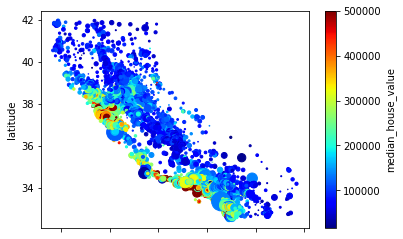

In [14]:
plt.figure(figsize=(20,12))
df.plot(kind = "scatter", x = "longitude",
        y = "latitude",c = "median_house_value", cmap = plt.get_cmap("jet"),
       s = df["population"]/100)

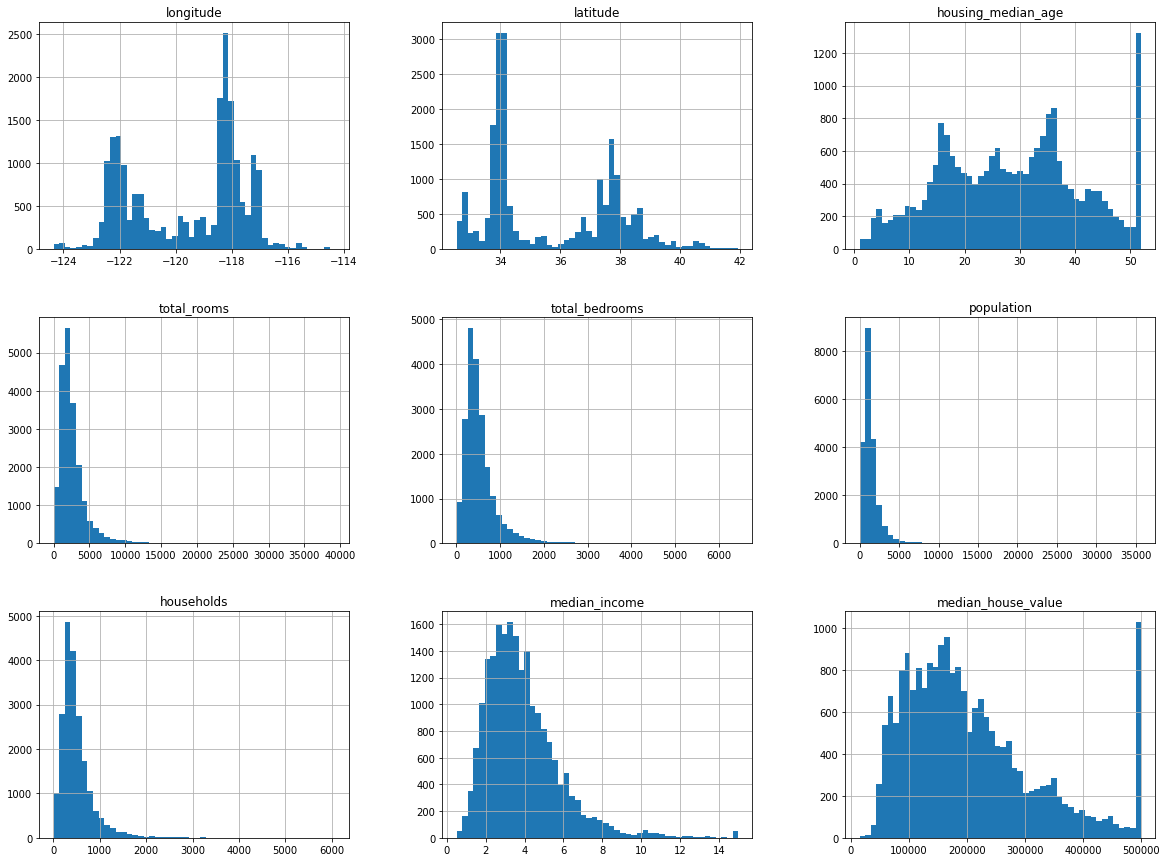

In [15]:
df.hist(bins=50, figsize=(20,15))
plt.show();

In [16]:
y=df['median_house_value']
data=df.drop('median_house_value',axis=1)


Box plot graph shows the presence of outliers in the graph above the max quartile range

<AxesSubplot:>

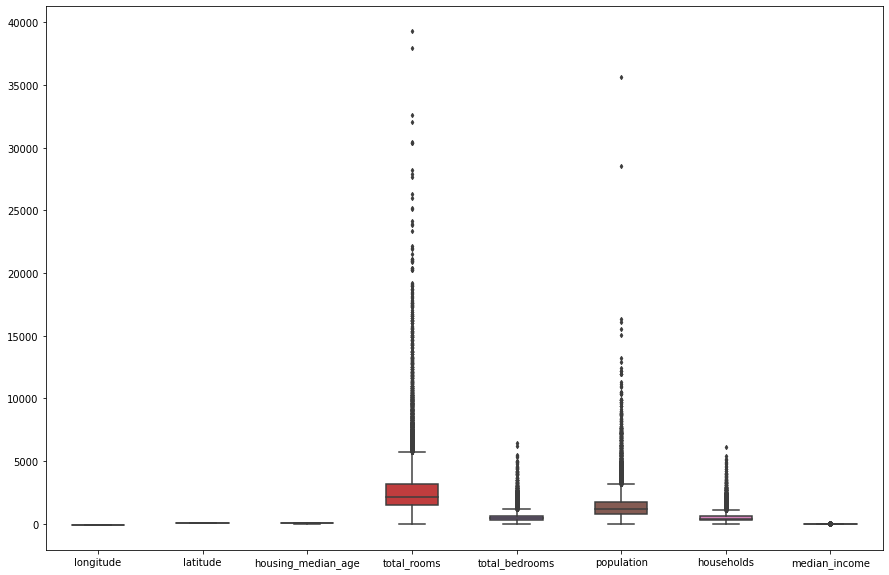

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [18]:
#treating outliers from boxplot

def IQR(col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    return iqr,q1,q3

# IQR
lower whiskers is the range between the minimum and lower quartile
Higher whiskers is the range from upper quartile and maximum quartile
iqr is the interquartile range between the lower and upper quartile

In [19]:
def whisker(col):
    iqr,q1,q3 = IQR(col)
    lower_whisker = q1 - 1.5*iqr
    upper_whisker = q3 + 1.5*iqr
    return lower_whisker,upper_whisker

In [20]:
for col in data.columns:
    if data[col].dtype!="object":
        lw,uw = whisker(col)
        print("Feature:-{} Lower:-{} Upper:-{}".format(col,lw,uw))

Feature:-longitude Lower:--127.48499999999999 Upper:--112.32500000000002
Feature:-latitude Lower:-28.259999999999998 Upper:-43.38
Feature:-housing_median_age Lower:--10.5 Upper:-65.5
Feature:-total_rooms Lower:--1102.625 Upper:-5698.375
Feature:-total_bedrooms Lower:--222.375 Upper:-1162.625
Feature:-population Lower:--620.0 Upper:-3132.0
Feature:-households Lower:--207.5 Upper:-1092.5
Feature:-median_income Lower:--0.7063750000000004 Upper:-8.013024999999999


# Treating outliers
all the dataplots that are below the min quartile and upper than the max range would be removed

In [21]:
def treat_outliers(value):
    lower_limit,upper_limit = whisker(col)
    data[col] = np.where(data[col]<lower_limit,lower_limit,data[col])
    data[col] = np.where(data[col]>upper_limit,upper_limit,data[col])

cheking for the variable having NaN values

In [22]:
for col in data.columns:
    if data[col].dtype!="object":
        treat_outliers(col)

# Heatmap showing colinearity 

<AxesSubplot:>

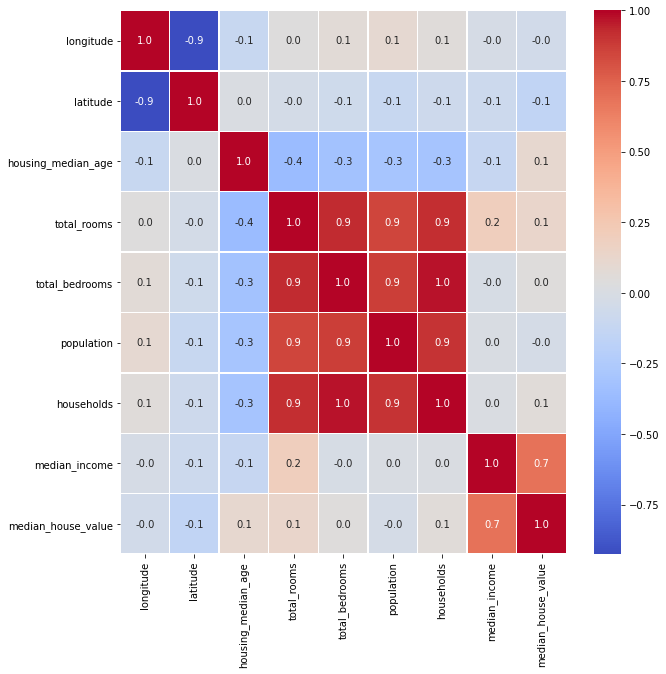

In [23]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap='coolwarm')

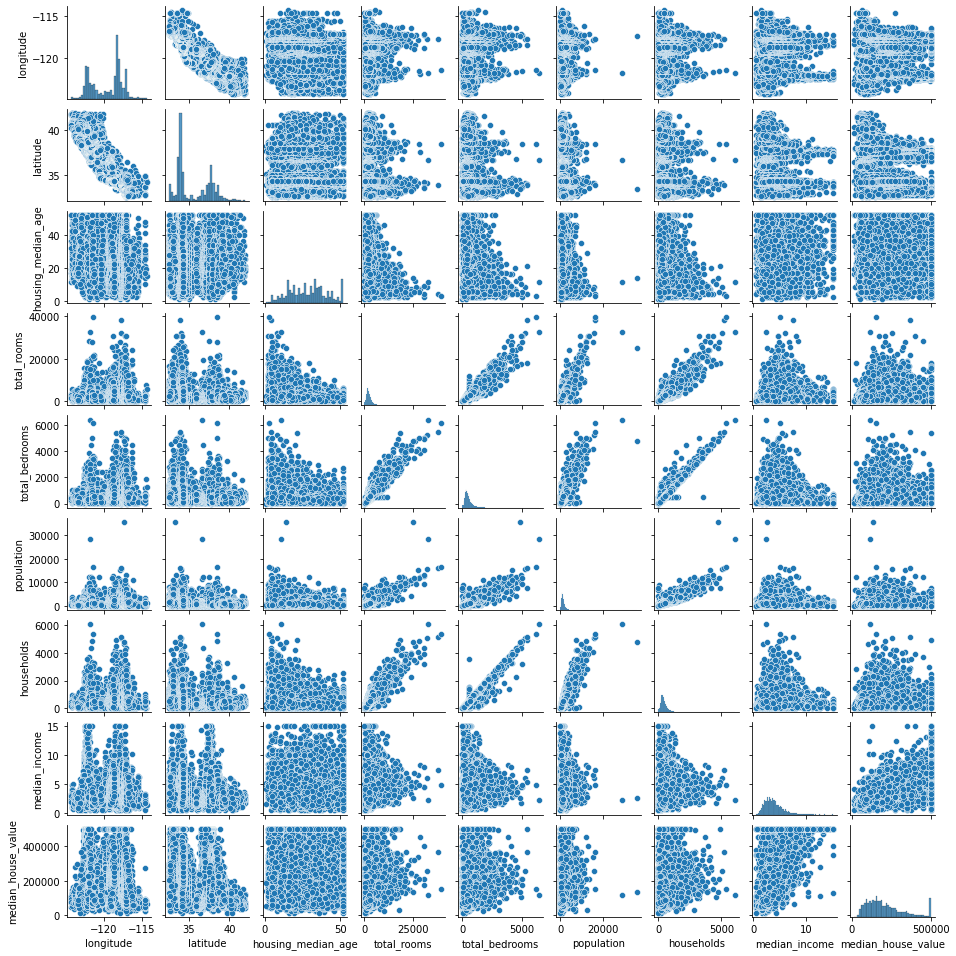

In [24]:
sns.pairplot(df,height=1.5)
# you can see that there is negative linearity in latitude and longitude
#Positive linearity in total rooms and total_bedrooms
#pos lin in household and total rooms and pos lin with househld and total bedrooms

WE have a threshold value of 0.7 then we are calling for the name of the particular column labels

In [25]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [26]:
corr_features = correlation(data, 0.7)
corr_features

{'households', 'latitude', 'population', 'total_bedrooms'}

using drop command to drop the above columns

In [27]:
df=data.drop(corr_features,axis=1)
df

,longitude,housing_median_age,total_rooms,median_income,ocean_proximity
0,-122.23,41.0,880.000,8.013025,NEAR BAY
1,-122.22,21.0,5698.375,8.013025,NEAR BAY
2,-122.24,52.0,1467.000,7.257400,NEAR BAY
3,-122.25,52.0,1274.000,5.643100,NEAR BAY
4,-122.25,52.0,1627.000,3.846200,NEAR BAY
...,...,...,...,...,...
20635,-121.09,25.0,1665.000,1.560300,INLAND
20636,-121.21,18.0,697.000,2.556800,INLAND
20637,-121.22,17.0,2254.000,1.700000,INLAND
20638,-121.32,18.0,1860.000,1.867200,INLAND


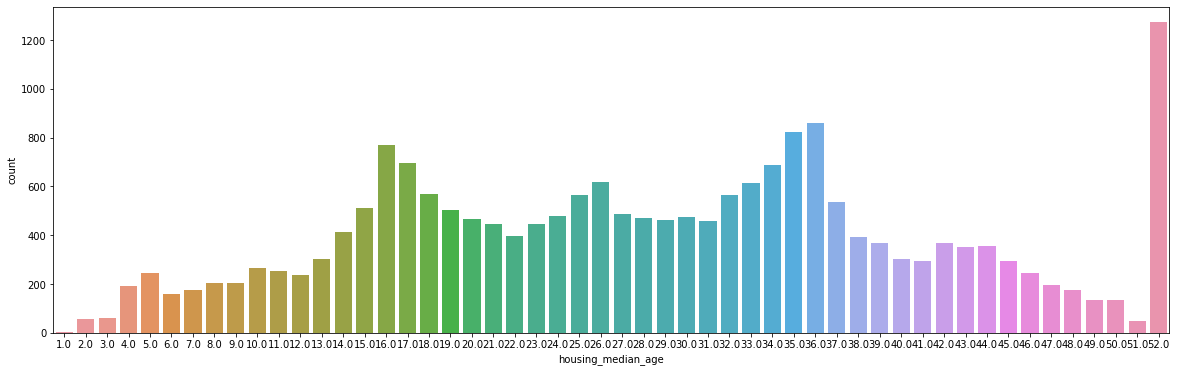

In [28]:
#there is an outlayer in the graph usually the house age is 0.16-0.26
#The houses with the age 50-52 and  are not great in number 
plt.figure(figsize=(20,6))
sns.countplot(data=df, x = "housing_median_age")
plt.show()

# This is the box plot after removing outliers

<AxesSubplot:>

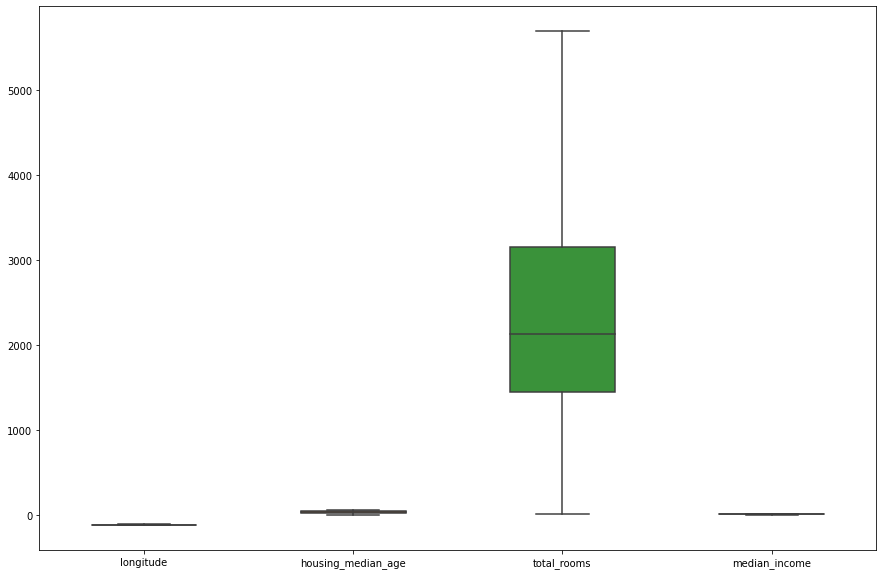

In [29]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

In [30]:
df['ocean_proximity'] = df['ocean_proximity'].str.replace(" ","")


In [31]:

from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column])

<ipython-input-31-b2b38dba6098>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:


In [32]:
df.head()

,longitude,housing_median_age,total_rooms,median_income,ocean_proximity
0,-122.23,41.0,880.000,8.013025,3
1,-122.22,21.0,5698.375,8.013025,3
2,-122.24,52.0,1467.000,7.257400,3
3,-122.25,52.0,1274.000,5.643100,3
4,-122.25,52.0,1627.000,3.846200,3


# Removing skewness 

c:\users\siddh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\siddh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\siddh\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

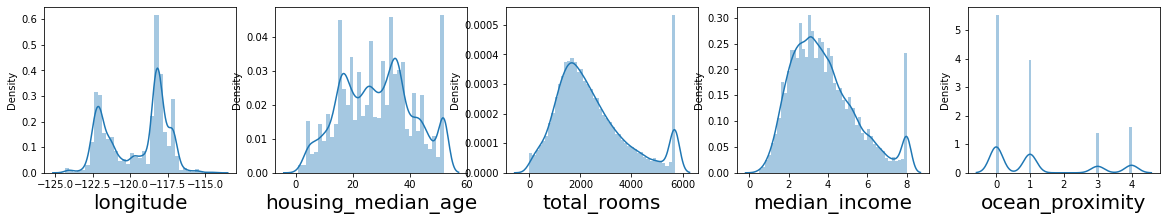

In [33]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=35 :
        ax = plt.subplot(7,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

# Testing and Training 

In [34]:

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 


In [35]:
X = df

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error 


using standarization for scaling rhe values to a scalable format or range which is from -1 to 1 in general

In [37]:
#to standardize the data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[-1.32783522,  0.98214266, -1.11728533,  2.54100555,  1.2910888 ],
       [-1.32284391, -0.60701891,  2.32993607,  2.54100555,  1.2910888 ],
       [-1.33282653,  1.85618152, -0.69732654,  2.08515552,  1.2910888 ],
       ...,
       [-0.8237132 , -0.92485123, -0.13428127, -1.26748763, -0.11673923],
       [-0.87362627, -0.84539315, -0.41616162, -1.16661997, -0.11673923],
       [-0.83369581, -1.00430931,  0.24561331, -0.85207213, -0.11673923]])

# VIF 
checking for the inflation factor, which for our case was moderate. 

In [38]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns
vif

,vif,Features
0,1.099897,longitude
1,1.196865,housing_median_age
2,1.229563,total_rooms
3,1.072012,median_income
4,1.101403,ocean_proximity


In [39]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)


# Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(random_state =1)
forest_model.fit(x_train,y_train)


forest_model.score(x_test,y_test)
y_pred = forest_model.predict(x_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
print('RMSE value for randomforest Regressor: ', lin_rmse)


RMSE value for randomforest Regressor:  60084.40367888553


# Hyperparameter tuning

allows the model to choose the best one from the give nset of range

In [41]:
#hyperparameter tuning - run this cell
grid_param = {
    "n_estimators" : [90,100,115,130],
    'max_depth' : range(2,3,1),
    'min_samples_leaf' : range(1,3,1),
    'min_samples_split': range(2,4,1),
}

By the use of grid search, we get the optimal values for our hyper parameters

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV

grid_search = GridSearchCV(estimator=forest_model,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)
grid_search.fit(x_train, y_train)
#let's see the best parameters as per our grid search
grid_search.best_params_



Fitting 5 folds for each of 16 candidates, totalling 80 fits


{'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 130}

In [43]:


BPRF=RandomForestRegressor(n_estimators=130,
                           max_depth= 2,
                           min_samples_leaf= 1,
                           min_samples_split= 2,
                           random_state = 1)
BPRF.fit(x_train,y_train)

y_pred = BPRF.predict(x_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)

print('RMSE value for Randomforest Regression: ', lin_rmse)





RMSE value for Randomforest Regression:  84560.22781925873


# Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

print(lin_reg.intercept_)
print(lin_reg.coef_)

y_pred = lin_reg.predict(x_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)

print('RMSE value for Linear Regression: ', lin_rmse)

207055.81355698762
[  792.69518432 26292.16766103  9240.1916352  81064.76421903
  7775.58169287]
RMSE value for Linear Regression:  78545.52302733871


# XG Boosting

In [45]:
!pip install XGBOOST

You should consider upgrading via the 'c:\users\siddh\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [46]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)

print('RMSE value for XGB Regressor: ', lin_rmse)


RMSE value for XGB Regressor:  58582.90877982395
